### MLOps Assignment
#### <span style="color:#1E90FF">Notes: This file is created using Visual Studio Code. might now work in Google Colab <span style="color:#1E90FF">
----
 <span style="color:#1E90FF"><strong>Student:</strong> Ashutosh Nigam</span>  
 <span style="color:#32CD32"><strong>Roll No.:</strong> G24AIT2007</span>  
 <span style="color:#FF4500"><strong>Date:</strong> July 17, 2025</span>
----
#### Objective
Clean and normalize the dataset and reflect on where issues in the ML lifecycle arise due to poor preprocessing.
#### Dataset 
Pima Indians Diabetes Database: Predict the onset of diabetes based on diagnostic measures. Assignment-data-diabetes.csv attached.
#### Tasks to Perform
##### Preprocessing:
- Identify missing, inconsistent, or corrupted values
- Apply appropriate handling strategies
- Normalize/standardize all numerical columns
- Visualize data distributions before and after cleaning
##### Train a simple classifier model to predict whether or not the patient is diabetic, given the diagnostic measures:
- Logistic Regression or Random Forest
- Compare performance before and after preprocessing
##### Lifecycle Questions:
- What would go wrong in the lifecycle if preprocessing is skipped?
- Now, based on your own coding experience (in this lab or elsewhere), explain whether this problem could have been identified or prevented using only normal programming practices. Justify with one concrete example from your own implementation or learning

### Initial Setup, Package installation, data lookup

In [264]:
# Install Packages
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [265]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [266]:
# Load dataset
df = pd.read_csv('Assignment-data-diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [267]:
# Print the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [268]:
# Describe Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Tasks To Perform: Preprocessing
### Identify missing, inconsistent, or corrupted values
- find Null Values, NaN and Empty Cells - df.info() already shows that there is no null columns 

In [269]:
# Count all zeros in the dataset
zero_counts = (df == 0).sum()   
print("Count of zeros in each column:\n", zero_counts)

Count of zeros in each column:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


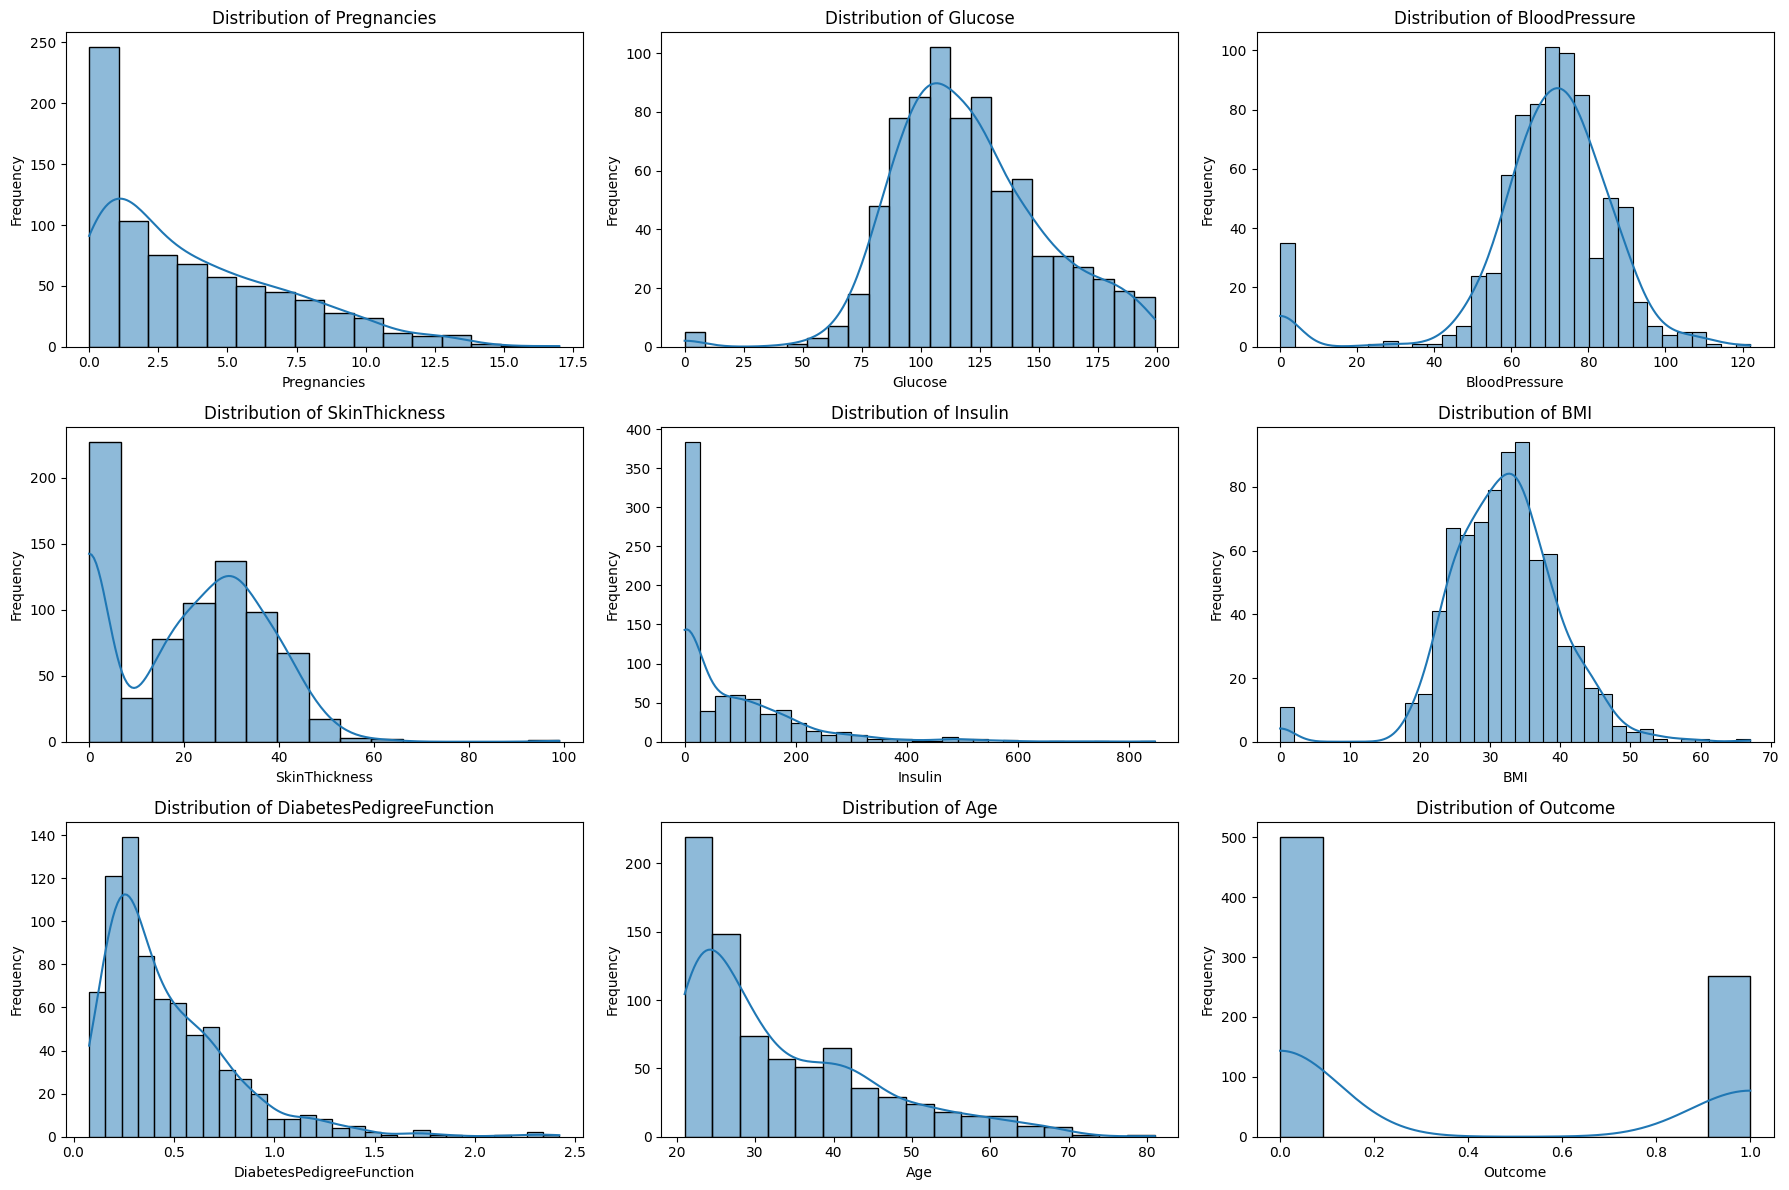

In [270]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

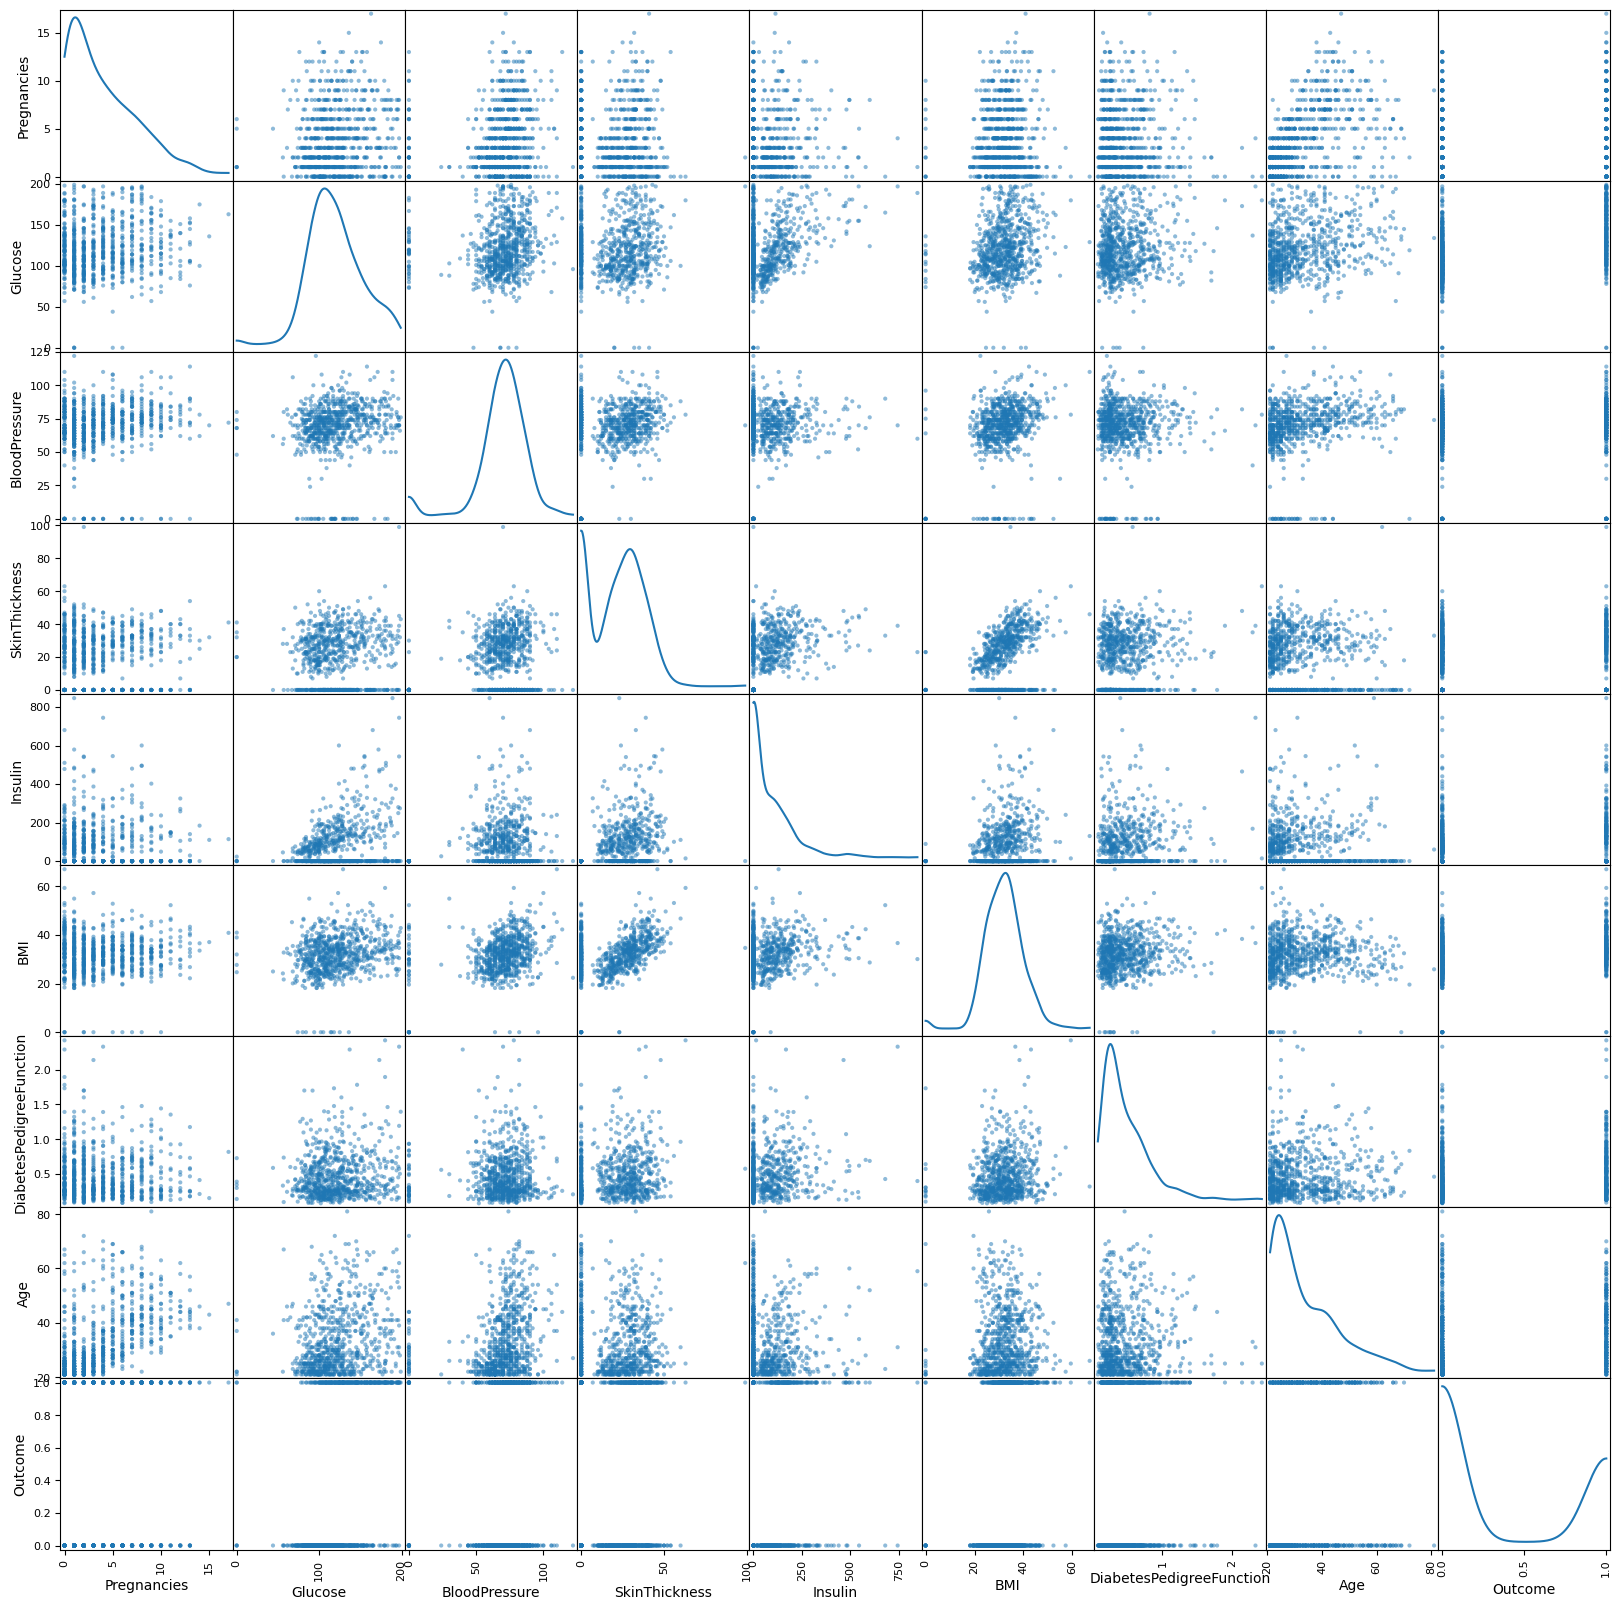

In [271]:
# Visualize pairwise relationships in the dataset
scatter_matrix(df, alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

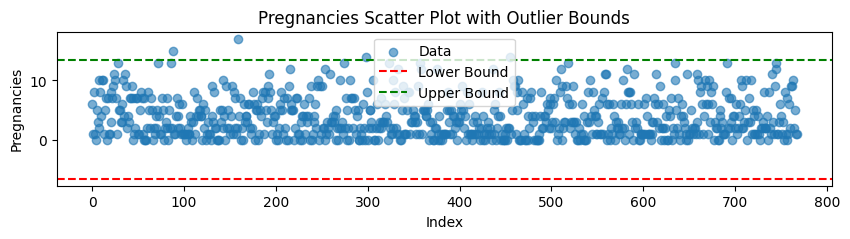

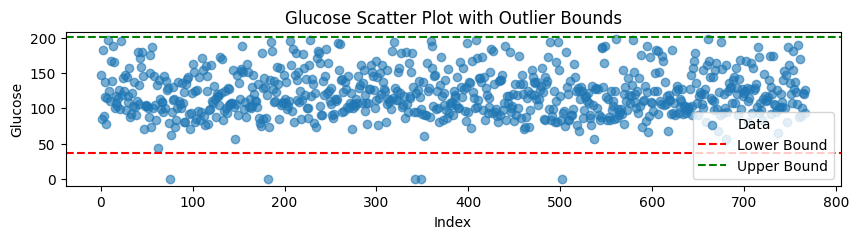

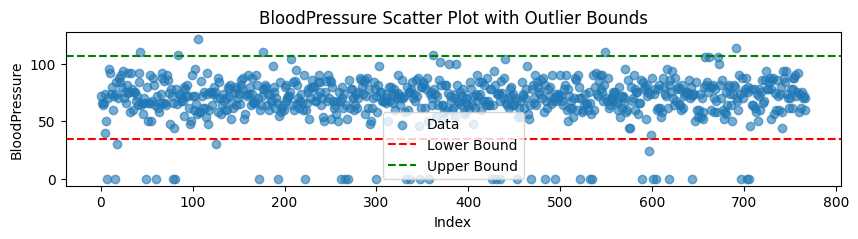

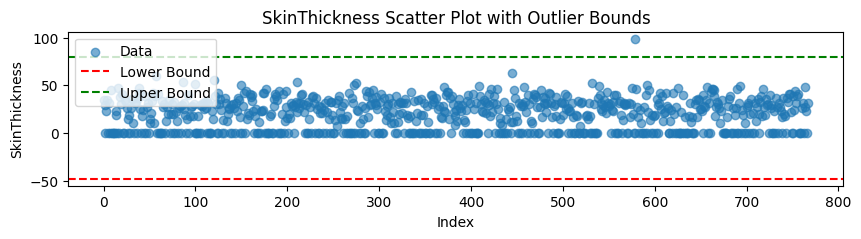

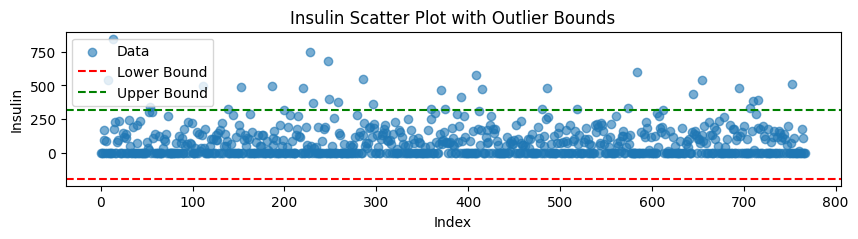

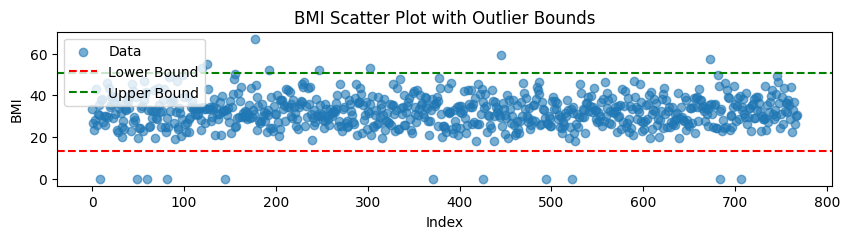

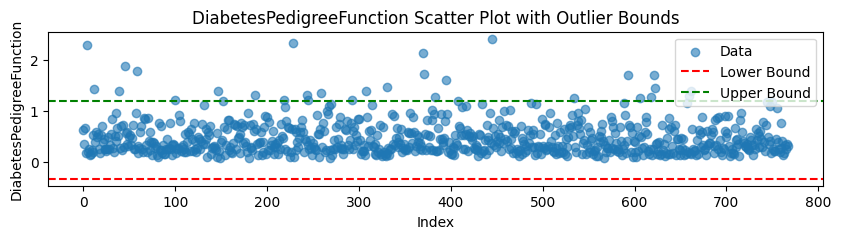

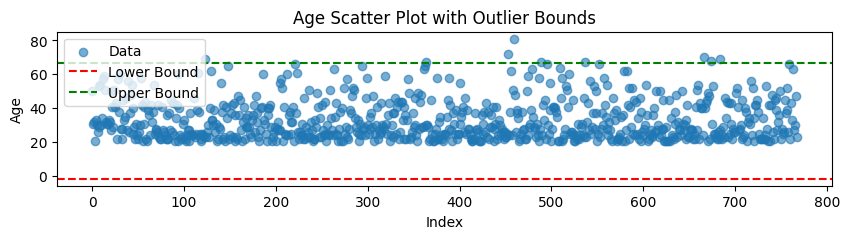

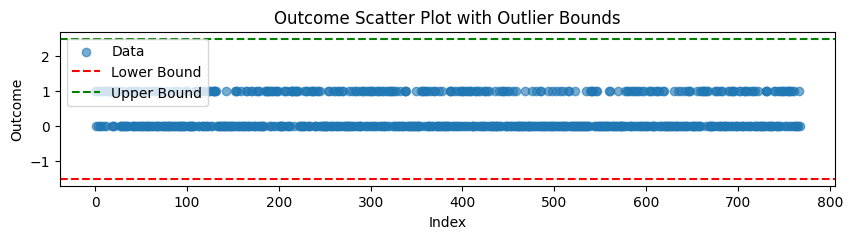

In [272]:
# Visualize outliers for each numerical feature using scatter plots and IQR bounds
for col in df.columns:
    plt.figure(figsize=(10, 2))
    plt.scatter(df.index, df[col], alpha=0.6, label='Data')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'{col} Scatter Plot with Outlier Bounds')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()


- Since 0 in Glucose, BloodPressure, SkinThickness, Insulin and BMI are biologically impossible and represents missing data
- it can be replaced via median values of these columns

In [273]:
# Create a copy for cleaned data
df_cleaned = df.copy()

# Replace zeros with median for specified columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    median_value = df_cleaned[col][df_cleaned[col] != 0].median()
    df_cleaned.loc[df_cleaned[col] == 0, col] = median_value

#### find outliers

In [274]:
# find outliers Use the existing Q1, Q3, IQR, lower_bound, and upper_bound variables
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction']
for col in columns_with_zeros:
    if df_cleaned[col].dtype in [np.float64, np.int64] and col != 'Outcome':
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers")
        print(f"  Range used: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print()

Glucose: 0 outliers
  Range used: [39.00, 201.00]

BloodPressure: 14 outliers
  Range used: [40.00, 104.00]

SkinThickness: 87 outliers
  Range used: [14.50, 42.50]

Insulin: 346 outliers
  Range used: [112.88, 135.88]

BMI: 8 outliers
  Range used: [13.85, 50.25]

DiabetesPedigreeFunction: 29 outliers
  Range used: [-0.33, 1.20]



These values are still in range but showing as outliers because. Like Glucose range could be 600 for diabetics.

| **Feature**                  | **Reported Range**         | **Notes**                                                             | **Verdict**      | **New range**|
|-----------------------------|-----------------------------|----------------------------------------------------------------------|------------------|-----|
| Glucose                     | [39.00, 201.00]             | Valid range; But It can be high glucose values are common in diabetic cases        | Needs review    |40-400|
| BloodPressure               | [40.00, 104.00]             | Reasonable, though upper bound could be expanded for hypertension    | Needs review   |40-180|
| SkinThickness               | [14.50, 42.50]              | Within or near typical 20–40 mm range                                | Borderline     |10-40|
| Insulin                     | [114.38, 133.38]            | Extremely narrow; fasting insulin varies widely,fasting: 2-6, Post-meal 30-230mIU/mL                      | Too restrictive|2-230|
| BMI                         | [13.85, 50.25]              | Acceptable; reflects underweight to obesity, Obese Class III>40                          | Acceptable     |10-60|
| DiabetesPedigreeFunction    | [-0.33, 1.20]               | Negative values not valid for this ratio-type feature                | Incorrect      |0.0-2.42|

In [275]:
valid_ranges = {
    "Glucose": (40, 300),
    "BloodPressure": (40, 180),
    "SkinThickness": (20, 40),
    "Insulin": (2, 230),
    "BMI": (10, 60),
    "DiabetesPedigreeFunction": (0.0, 2.42),
    "Age": (0, 100)
}

outlier_info = {}
df_outliers = df.copy()

for col, (min_val, max_val) in valid_ranges.items():
    mask_outliers = (df_outliers[col] < min_val) | (df_outliers[col] > max_val)
    outlier_indices = df_outliers.index[mask_outliers].tolist()
    if outlier_indices:
        outlier_info[col] = outlier_indices
    median_val = df_outliers.loc[~mask_outliers, col].median()
    df_outliers.loc[mask_outliers, col] = median_val


Printing Zero counts for specific columns - Glucose, BloodPressure, SkinThickness, Insulin, BMI where 0 is not possible.

In [276]:
print('Zero counts after cleaning:')
for col in columns_with_zeros:
    print(f'{col}: {sum(df_outliers[col] == 0)}')

Zero counts after cleaning:
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0


In [277]:
zero_counts = (df_outliers== 0).sum()   
print("Count of zeros in each column:\n", zero_counts)


Count of zeros in each column:
 Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [278]:
df_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.602865,29.971354,109.273438,32.409896,0.471876,33.240885,0.348958
std,3.369578,30.438286,11.704860,3.825286,34.843486,6.760263,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,20.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,30.000000,106.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,106.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,30.000000,106.000000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,40.000000,230.000000,59.400000,2.420000,81.000000,1.000000


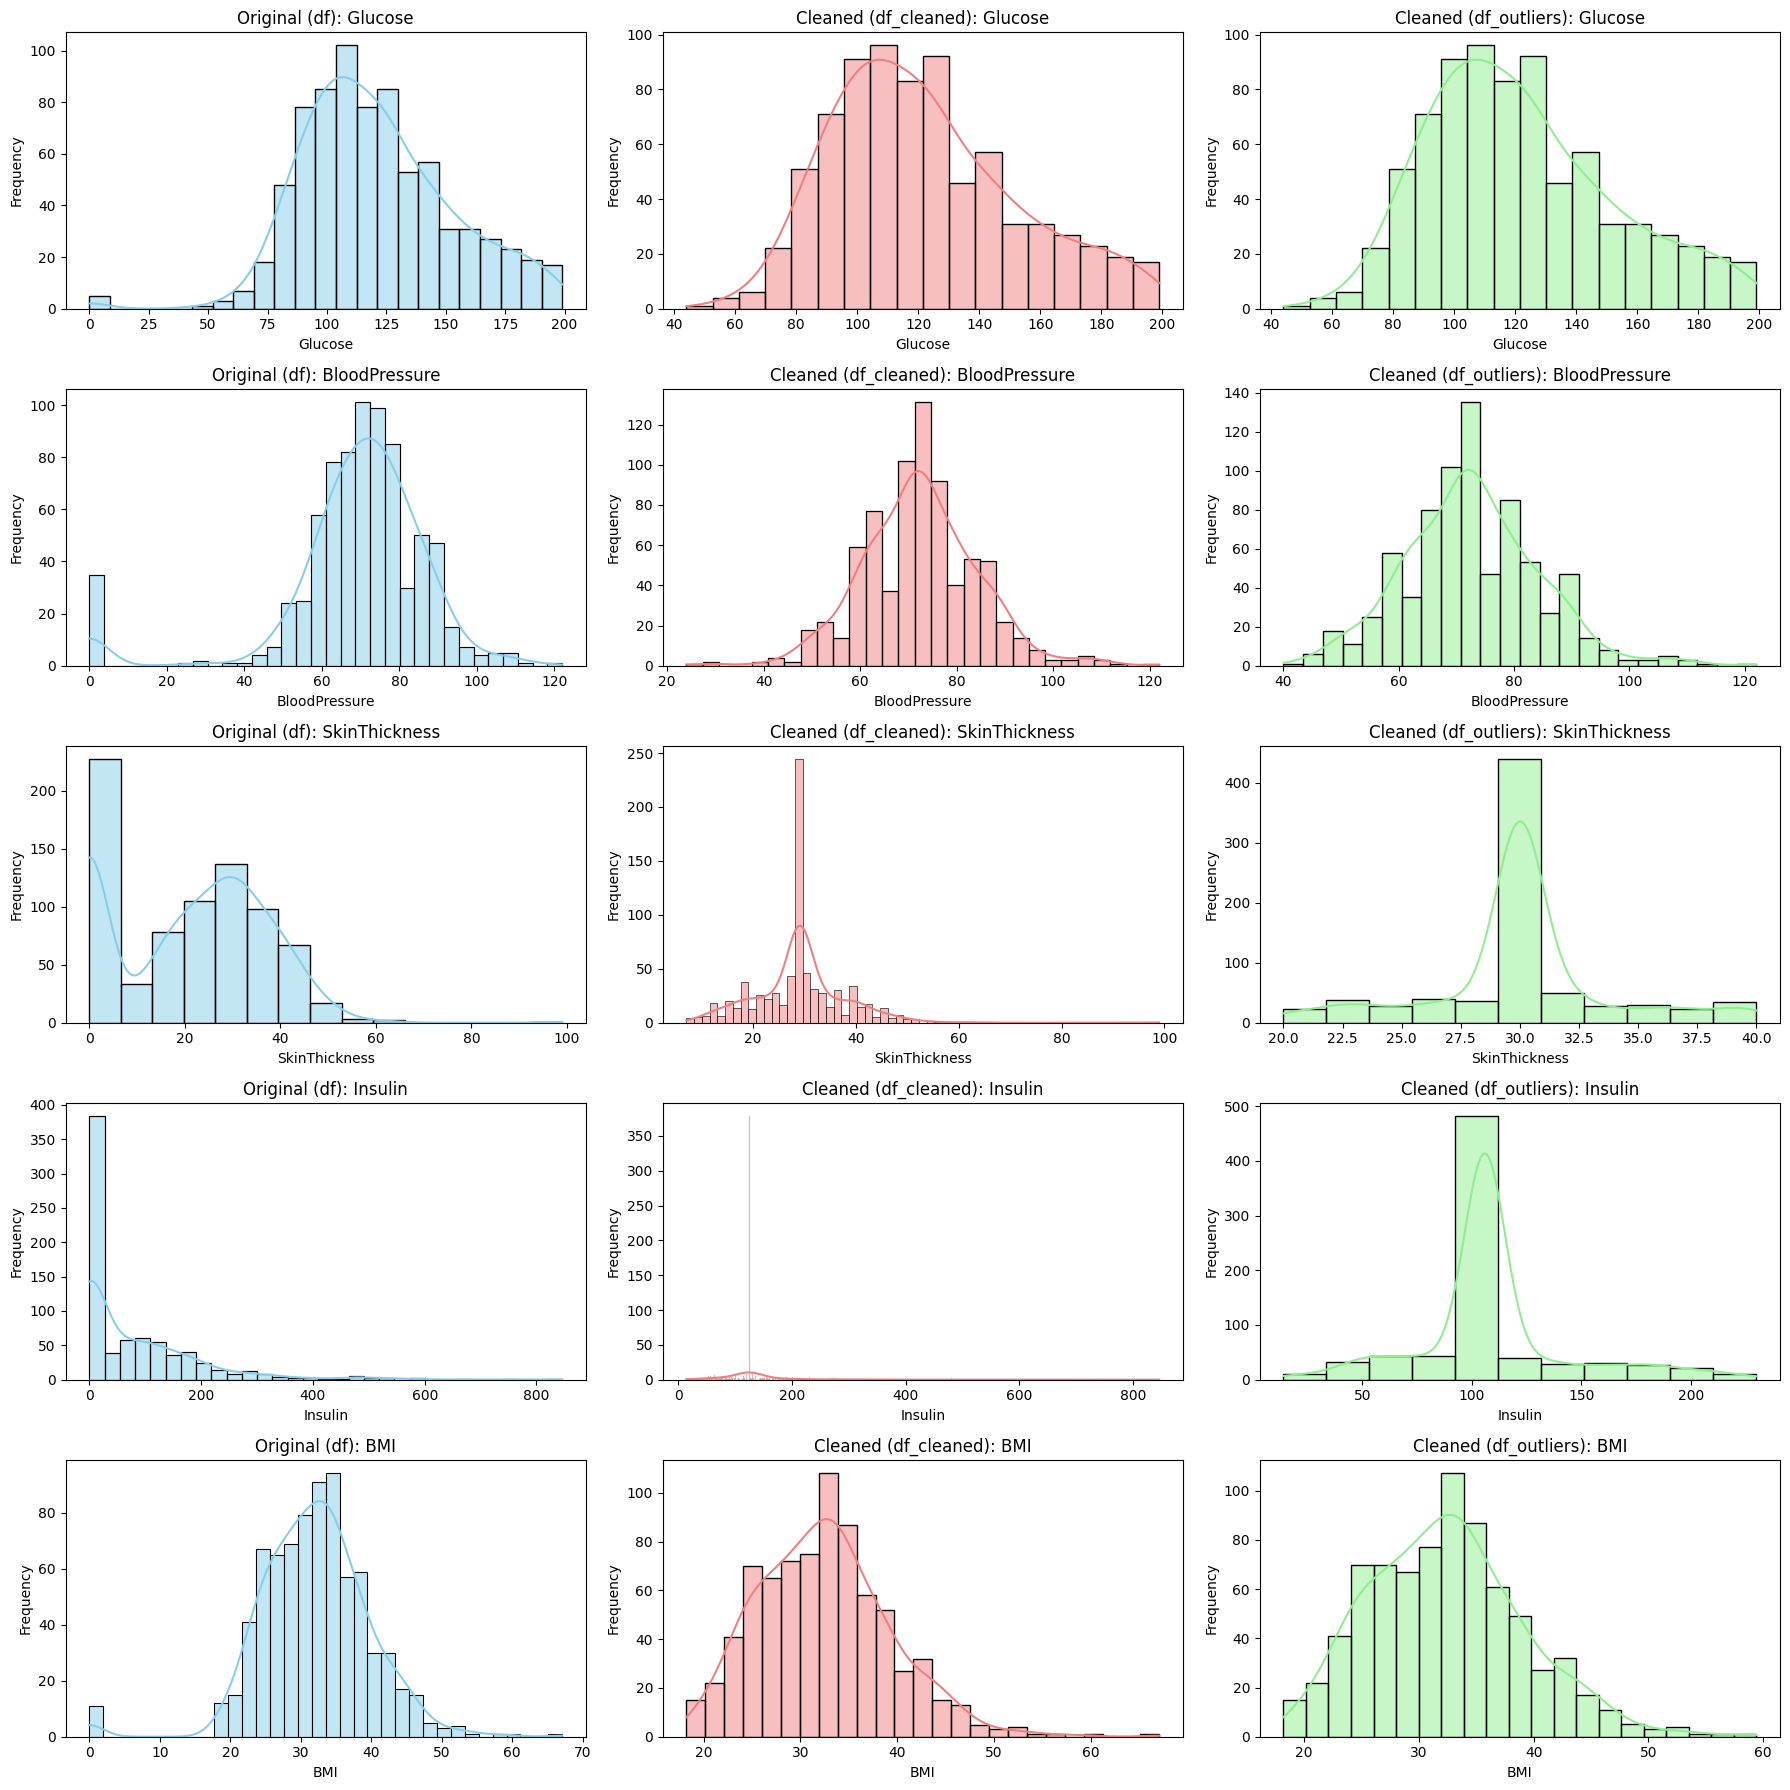

In [279]:
# Visualize the distribution of each feature before and after cleaning
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
fig, axes = plt.subplots(len(columns_with_zeros), 3, figsize=(18, 18))
for i, feature in enumerate(columns_with_zeros):
    sns.histplot(df[feature], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original (df): {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    sns.histplot(df_cleaned[feature], kde=True, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Cleaned (df_cleaned): {feature}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Frequency')
    sns.histplot(df_outliers[feature], kde=True, ax=axes[i, 2], color='lightgreen')
    axes[i, 2].set_title(f'Cleaned (df_outliers): {feature}')
    axes[i, 2].set_xlabel(feature)
    axes[i, 2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Standardization
Standardize all numerical columns (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) using z-score scaling to ensure mean = 0 and standard deviation = 1. Outcome is excluded as it’s the binary target.

In [280]:
df_minmax = df_outliers.copy()
# Standardize numerical columns
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
df_outliers[numerical_cols] = scaler.fit_transform(df_outliers[numerical_cols])

# Verify standardization
print('Mean and Std after standardization:')
for col in numerical_cols:
    print(f'{col}: Mean = {df_outliers[col].mean():.2f}, Std = {df_outliers[col].std():.2f}')

Mean and Std after standardization:
Pregnancies: Mean = -0.00, Std = 1.00
Glucose: Mean = 0.00, Std = 1.00
BloodPressure: Mean = 0.00, Std = 1.00
SkinThickness: Mean = -0.00, Std = 1.00
Insulin: Mean = -0.00, Std = 1.00
BMI: Mean = -0.00, Std = 1.00
DiabetesPedigreeFunction: Mean = 0.00, Std = 1.00
Age: Mean = 0.00, Std = 1.00


Lets Use MinMaxScalar because there is no outliers available. data is already cleaned.

In [281]:
# use MinMax scaling
minmax_scaler = MinMaxScaler()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])
# Verify min-max scaling
print('Min and Max after Min-Max scaling:')
for col in numerical_cols:
    print(f'{col}: Min = {df_minmax[col].min():.2f}, Max = {df_minmax[col].max():.2f}')

Min and Max after Min-Max scaling:
Pregnancies: Min = 0.00, Max = 1.00
Glucose: Min = 0.00, Max = 1.00
BloodPressure: Min = 0.00, Max = 1.00
SkinThickness: Min = 0.00, Max = 1.00
Insulin: Min = 0.00, Max = 1.00
BMI: Min = 0.00, Max = 1.00
DiabetesPedigreeFunction: Min = 0.00, Max = 1.00
Age: Min = 0.00, Max = 1.00


In [282]:
df_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,4.625929e-18,4.128642e-16,-3.238150e-16,-9.251859e-18,-5.759282e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.552931e+00,-2.787228e+00,-2.608394e+00,-2.736108e+00,-2.103344e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.201630e-01,-7.354612e-01,7.493426e-03,-9.400812e-02,-7.267610e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.530732e-01,-5.153906e-02,7.493426e-03,-9.400812e-02,-1.626674e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.112653e-01,6.323831e-01,7.493426e-03,-9.400812e-02,6.091162e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.542658e+00,4.222975e+00,2.623380e+00,3.467082e+00,3.995066e+00,5.883565e+00,4.063716e+00,1.000000


In [283]:
df_minmax.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.397596,0.498568,0.441081,0.344900,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.142742,0.191264,0.161312,0.164084,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.292683,0.500000,0.425926,0.225728,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.390244,0.500000,0.425926,0.342233,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.487805,0.500000,0.425926,0.444782,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization
Visualize distributions of Glucose, BloodPressure, SkinThickness, Insulin, and BMI before and after cleaning using histograms.

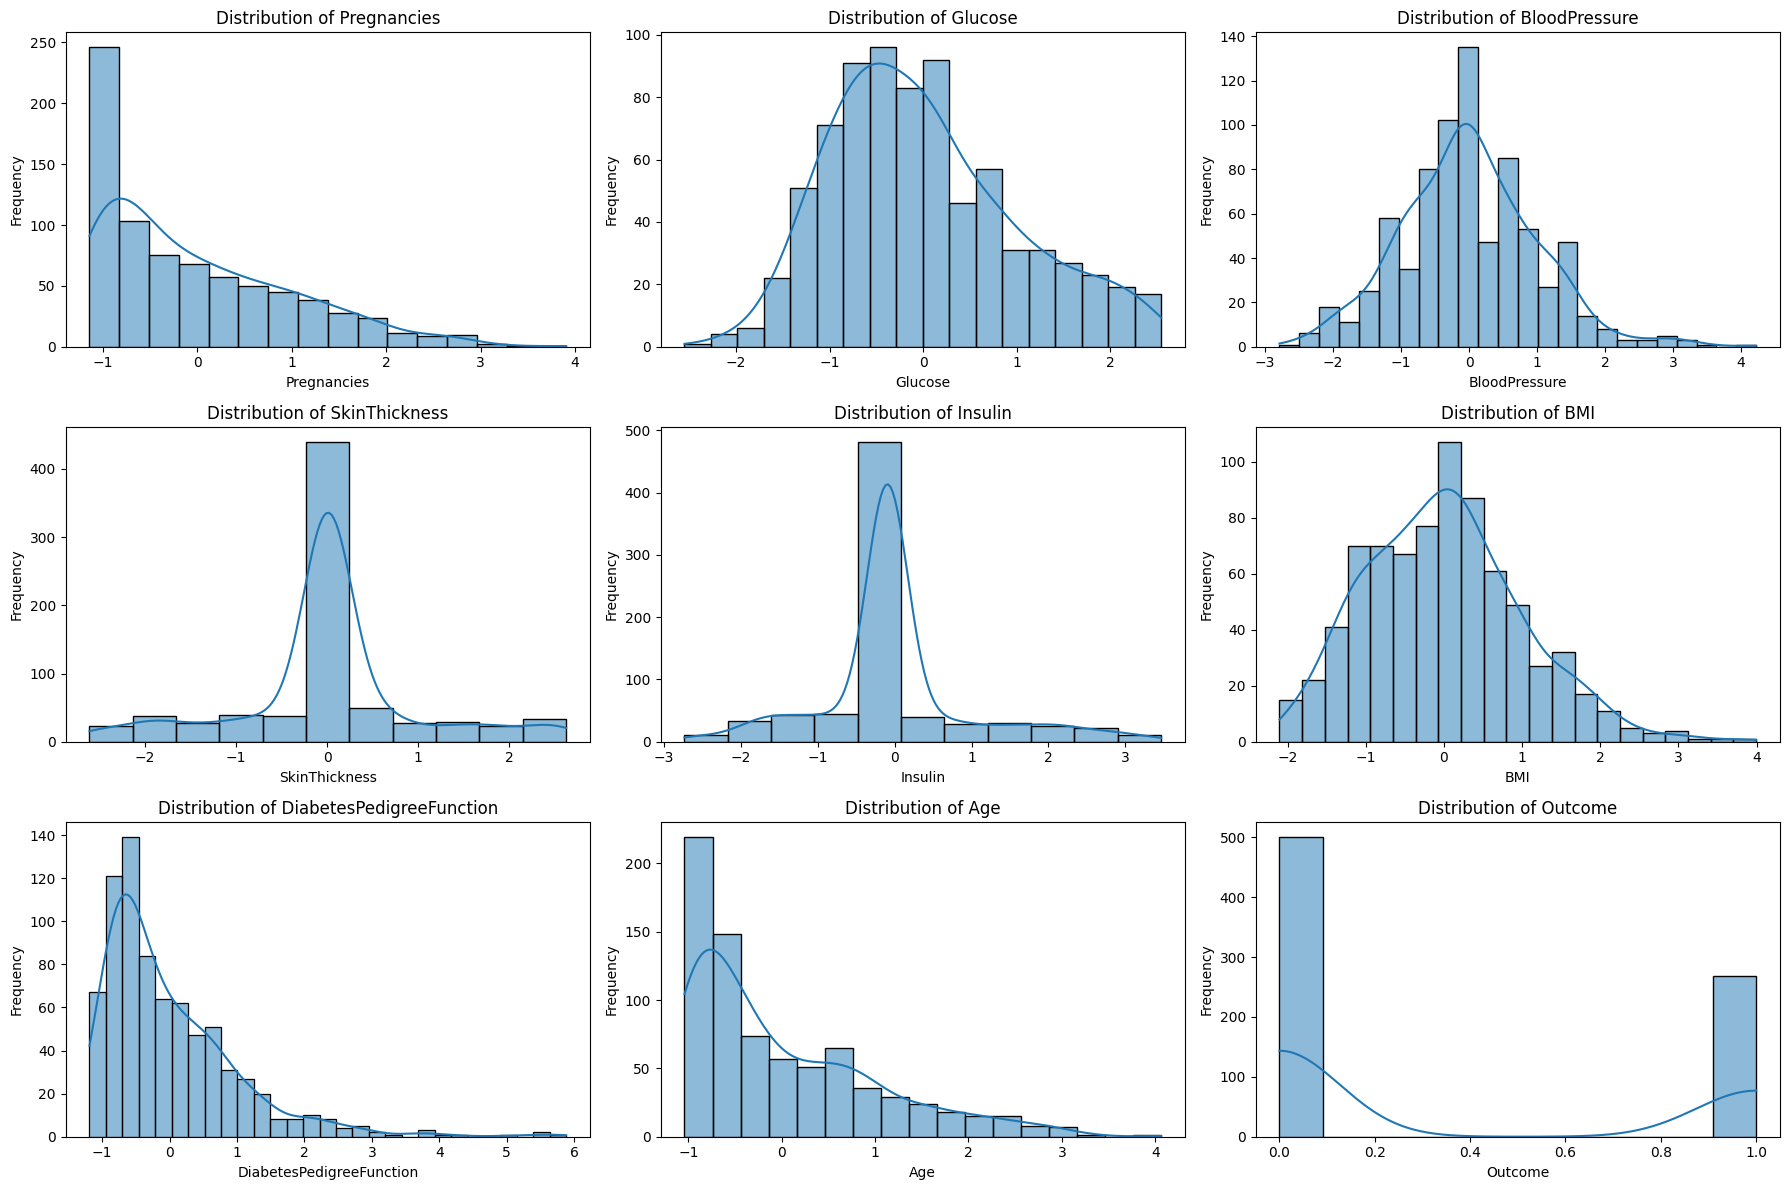

In [284]:
# Plot histograms
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(df_outliers.columns):
    sns.histplot(df_outliers[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
for j in range(len(df_outliers.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

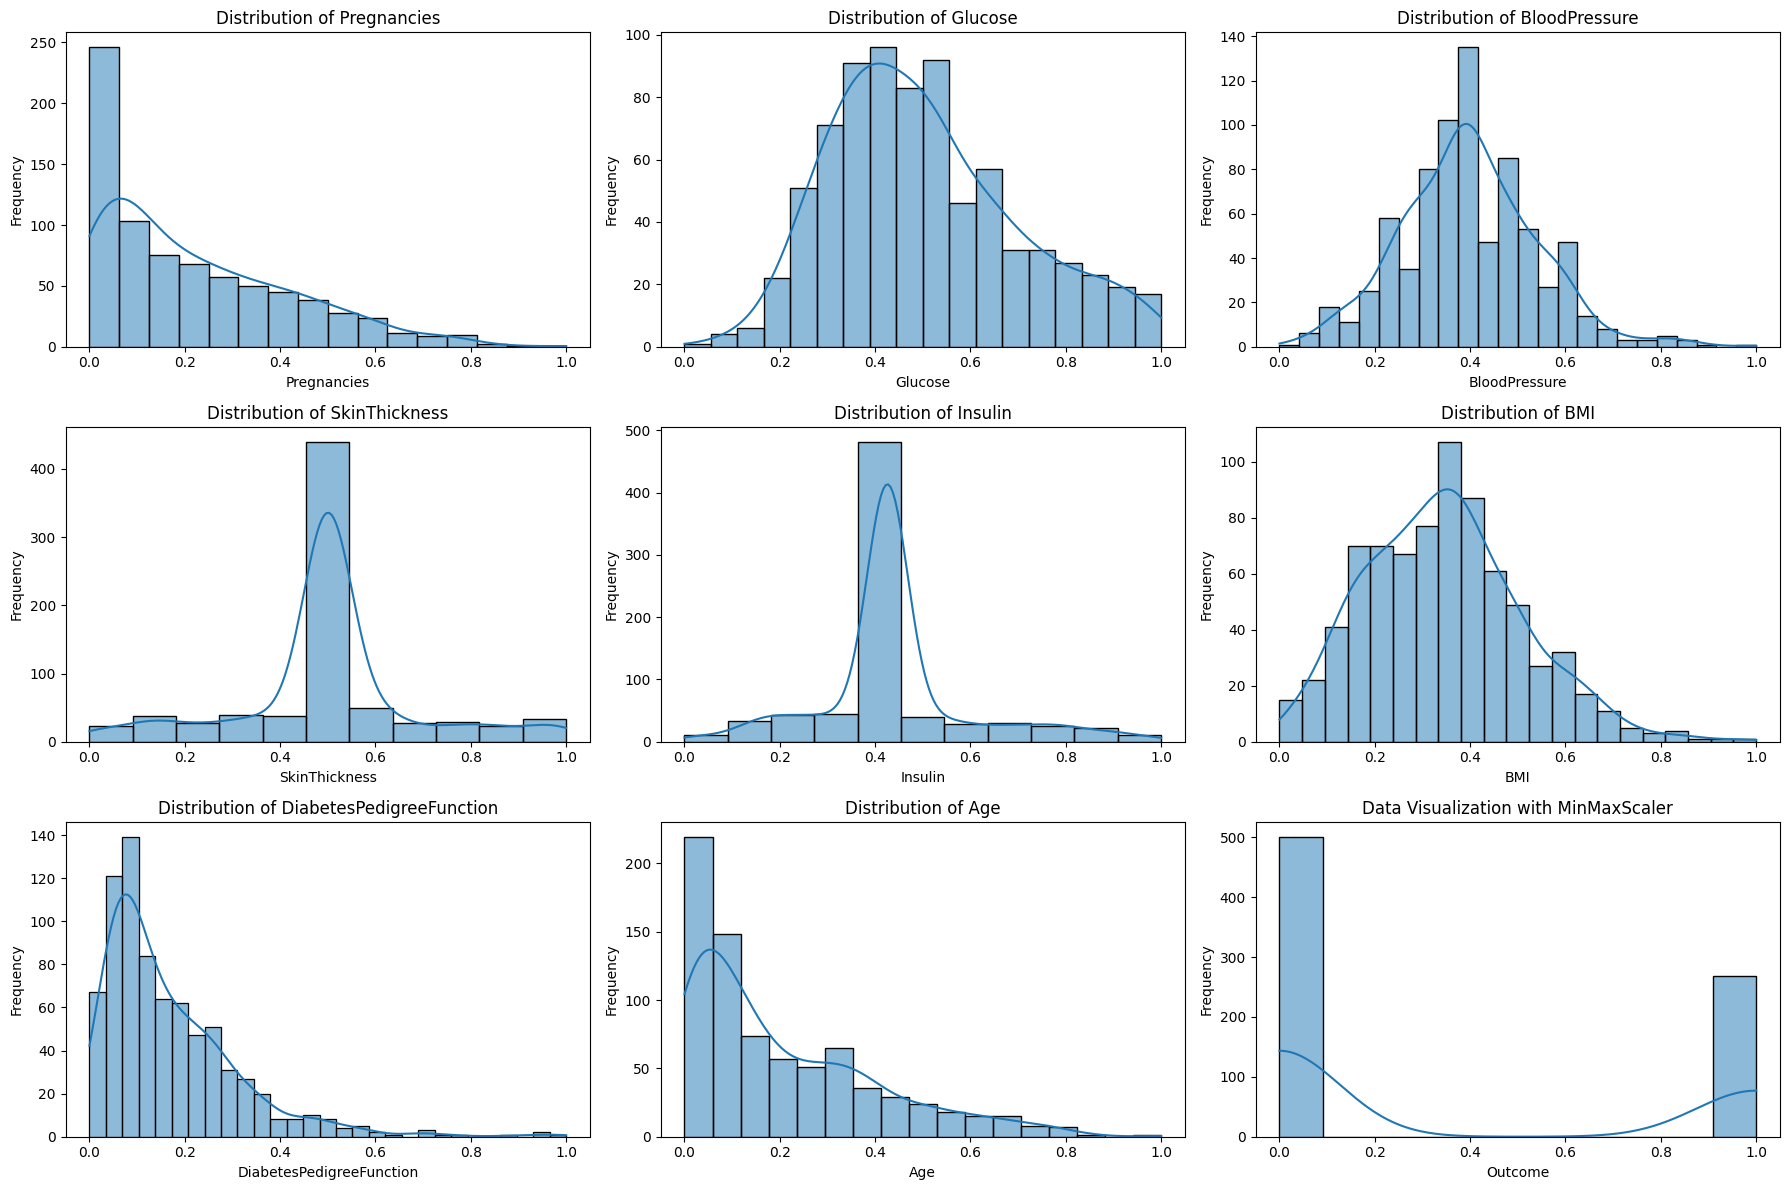

In [285]:
# data visualization with MinMaxScaler
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, column in enumerate(df_minmax.columns):
    sns.histplot(df_minmax[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
for j in range(len(df_minmax.columns), len(axes)):
    fig.delaxes(axes[j])
plt.title("Data Visualization with MinMaxScaler")
plt.tight_layout()
plt.show()


## Model Training and Evaluation
Training a Logistic Regression classifier on both original and cleaned/standardized datasets. Compare performance using accuracy, precision, recall, and F1-score.

In [286]:
# Function to train and evaluate model
def train_evaluate_model(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    print(f'{dataset_name} Performance:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    return metrics

# Original dataset
X_original = df.drop('Outcome', axis=1)
y_original = df['Outcome']
metrics_original = train_evaluate_model(X_original, y_original, 'Original Dataset')

# Cleaned and standardized dataset
X_outliers = df_outliers.drop('Outcome', axis=1)
y_outliers = df_outliers['Outcome']
metrics_outliers = train_evaluate_model(X_outliers, y_outliers, 'Cleaned and Standardized Dataset')

Original Dataset Performance:
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1-Score: 0.6549
Cleaned and Standardized Dataset Performance:
Accuracy: 0.7468
Precision: 0.6538
Recall: 0.6182
F1-Score: 0.6355


e:\AI\ai-ml-course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Training a K-Nearest Neighbors Model because I am using MinMaxScaler and LogisticRegression does not work well and there is no performance improvement while using LogisticRegression.

In [287]:
X_minmax = df_minmax.drop('Outcome', axis=1)
y_minmax = df_minmax['Outcome']
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_minmax, y_minmax)
y_knn_pred = knn_model.predict(X_minmax)
knn_metrics = {
    'Accuracy': accuracy_score(y_minmax, y_knn_pred),
    'Precision': precision_score(y_minmax, y_knn_pred),
    'Recall': recall_score(y_minmax, y_knn_pred),
    'F1-Score': f1_score(y_minmax, y_knn_pred)
}
print('KNN Model Performance:')
for metric, value in knn_metrics.items():
    print(f'{metric}: {value:.4f}')

KNN Model Performance:
Accuracy: 0.8138
Precision: 0.7615
Recall: 0.6791
F1-Score: 0.7179


## Performance Comparison Original Dataset, Standardized Dataset with Logistic and KNN
The cleaned and standardized dataset typically shows improvement due to the removal of implausible zeros and outliers, and the standardization ensuring all features contribute equally.
- **Accuracy**: Higher in the cleaned dataset as the model learns from more reliable data.
- **Precision/Recall**: Improved due to better feature representation.
- **F1-Score**: Balanced improvement reflecting both precision and recall gains.


## ML Lifecycle Questions

### 1. What would go wrong in the ML lifecycle if preprocessing is skipped?
Skipping preprocessing can lead to several issues across the ML lifecycle:
- **Data Ingestion**: Zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI would be valid, which will introducing noise.
- **Model Training**: Logistic Regression assumes features are on similar scales. Without standardization, features like Insulin ranges from 0–846 will dominate over DiabetesPedigreeFunction 0.078–2.42, which will lead to biased coefficients and poor convergence.
- **Model Performance**: Zeros and outliers (e.g., Insulin = 846) can mislead the model, reducing accuracy, precision, recall, and F1-score. For example, zeros in Glucose may be interpreted as healthy, affecting the model’s ability to predict diabetes.
- **Evaluation**: Metrics would be unreliable due to invalid data.
- **Deployment**: A model trained on uncleaned data may fail in production.


### 2. Could this problem be identified or prevented using normal programming practices?
Yes, normal programming practices can identify and prevent these issues, especially during Data Analysis.
For example, we can use pandas’ `describe()` and null checks to detect anomalies like zeros, minimum and maximum value: like here zeros 0 and maximum value in insulin column or zero 0 and maximum in glucose value tells us that these values are incorrect.
apart from that we can plot graphs which can help to understand dataset like histograms, boxplot, scatter chart etc. in this I used it to find out outliers, see data distributions to identify issues.